c:\Users\Dipanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.3515 - loss: 1.7535 - val_accuracy: 0.5527 - val_loss: 1.2514
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5733 - loss: 1.1924 - val_accuracy: 0.6127 - val_loss: 1.0983
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6372 - loss: 1.0241 - val_accuracy: 0.6453 - val_loss: 1.0244
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6746 - loss: 0.9146 - val_accuracy: 0.6668 - val_loss: 0.9588
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7073 - loss: 0.8274 - val_accuracy: 0.6852 - val_loss: 0.9136
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7289 - loss: 0.7657 - val_accuracy: 0.7043 - val_loss: 0.8599
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7510 - loss: 0.7095 - val_accuracy: 0.6897 - val_loss: 0.9098
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7647 -

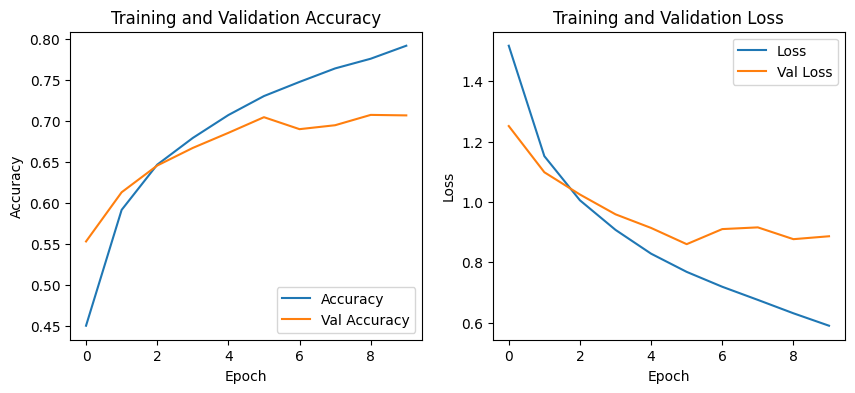

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


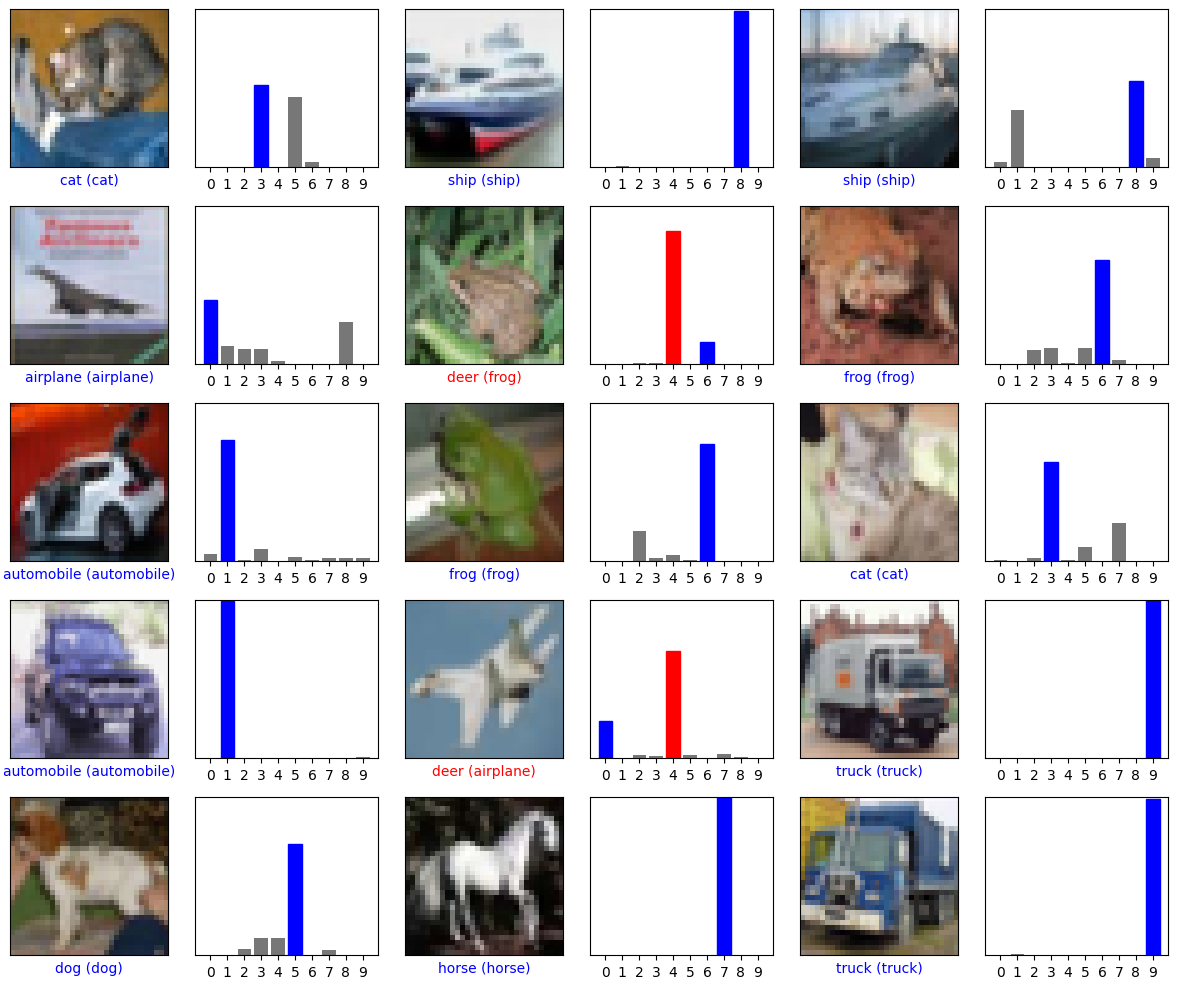

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the Convolutional Neural Network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Function to plot the image, predicted label, and true label
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = tf.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = tf.argmax(predictions_array[i])
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Plot a few predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
class_names = ['airplane','automobile','bird','cat','deer','dog', 'frog','horse','ship','truck']

In [4]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32,32))
    img = np.array(img)/255.0
    img = np.expand_dims(img,axis=0)
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


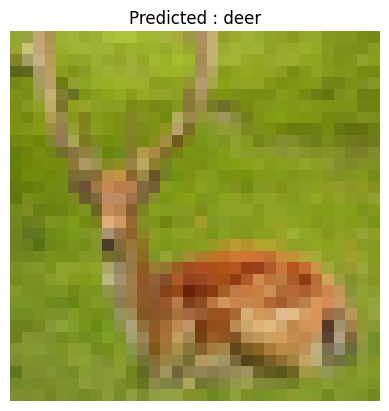

Predicted class: deer


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def predict_image(image_path):
    img = load_and_preprocess_image(image_path)  # You need to define load_and_preprocess_image function
    predictions = probability_model.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]

    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    plt.title(f"Predicted : {predicted_class_name}")
    plt.axis('off')
    plt.show()

    return predicted_class_name

# Assuming image_path is defined correctly without extra quotes
image_path = "C:/Users/Dipanshu/Downloads/deer.jpeg"
predicted_class_name = predict_image(image_path)
print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


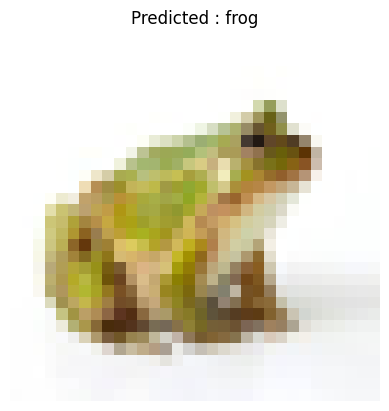

Predicted class: frog


In [11]:
image_path = "C:/Users/Dipanshu/Downloads/frog.jpeg"
predicted_class_name = predict_image(image_path)
print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


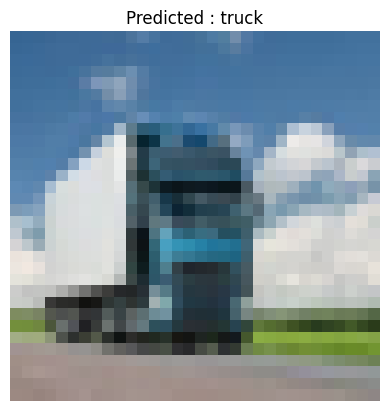

Predicted class: truck


In [8]:
image_path = "C:/Users/Dipanshu/Downloads/truck.jpeg"
predicted_class_name = predict_image(image_path)
print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


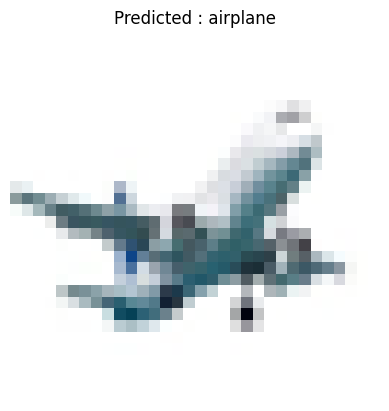

Predicted class: airplane


In [9]:
image_path = "C:/Users/Dipanshu/Downloads/plane.jpeg"
predicted_class_name = predict_image(image_path)
print(f"Predicted class: {predicted_class_name}")

In [1]:
image_path = "C:/Users/Dipanshu/Downloads/doog.jpeg"
predicted_class_name = predict_image(image_path)
print(f"Predicted class: {predicted_class_name}")

NameError: name 'predict_image' is not defined